In [1]:
## Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

os.makedirs('dataset_visualization', exist_ok=True)

In [3]:
dataset = pd.read_csv('export.csv')
dataset.head(2)

,Incident Number,Incident Type,Mental Health Flag,Priority Level,Response Datetime,Response Day of Week,Response Hour,First Unit Arrived Datetime,Call Closed Datetime,Sector,...,Unit Time on Scene,Call Disposition Description,Report Written Flag,Response Time,Officer Injured/Killed Count,Subject Injured/Killed Count,Other Injured/Killed Count,Geo ID,Census Block Group,Council District
0,253041790,Dispatched Incident,Not Mental Health Incident,Priority 2,2025 Oct 31 11:59:47 PM,Fri,23,2025 Nov 01 12:13:18 AM,2025 Nov 01 12:18:22 AM,Frank,...,304,False Alarm,0,853,0,0,0,4.845300e+11,4.530024e+09,2
1,253041786,Dispatched Incident,Not Mental Health Incident,Priority 2,2025 Oct 31 11:59:15 PM,Fri,23,2025 Nov 01 02:11:29 AM,2025 Nov 01 02:23:13 AM,George,...,704,Unable To Locate,0,"7,953",0,0,0,4.845300e+11,4.530007e+09,9


In [4]:
extracted_data = dataset[['Mental Health Flag', 'Priority Level', 'Response Datetime', 'Response Day of Week', 'Response Hour', 'Sector', 'Geo ID', 'Council District', 'Initial Problem Category']]
extracted_data.head(2)
extracted_data.shape[0]

812581

In [5]:
extracted_data.isnull().sum()

Mental Health Flag          0
Priority Level              0
Response Datetime           0
Response Day of Week        0
Response Hour               0
Sector                      0
Geo ID                      5
Council District            0
Initial Problem Category    0
dtype: int64

In [6]:
extracted_data.dropna(inplace=True)
extracted_data.isnull().sum()

Mental Health Flag          0
Priority Level              0
Response Datetime           0
Response Day of Week        0
Response Hour               0
Sector                      0
Geo ID                      0
Council District            0
Initial Problem Category    0
dtype: int64

In [7]:
extracted_data.shape[0]

812576

In [8]:
extracted_data.head(5)

,Mental Health Flag,Priority Level,Response Datetime,Response Day of Week,Response Hour,Sector,Geo ID,Council District,Initial Problem Category
0,Not Mental Health Incident,Priority 2,2025 Oct 31 11:59:47 PM,Fri,23,Frank,4.845300e+11,2,Alarms
1,Not Mental Health Incident,Priority 2,2025 Oct 31 11:59:15 PM,Fri,23,George,4.845300e+11,9,Crashes
2,Not Mental Health Incident,Priority 2,2025 Oct 31 11:58:43 PM,Fri,23,Edward,4.845304e+11,7,Trespassing
3,Not Mental Health Incident,Priority 2,2025 Oct 31 11:58:40 PM,Fri,23,Adam,4.845303e+11,6,Suspicious Things
4,Not Mental Health Incident,Priority 0,2025 Oct 31 11:58:15 PM,Fri,23,Adam,4.845304e+11,7,Burglary


In [9]:
print(f"Total Records: {len(extracted_data):,}")
print(f"Total Columns: {len(extracted_data.columns)}")
print(f"\nColumn Data Types:")
print(extracted_data.dtypes)
print(f"\nUnique Values Per Column:")
for col in extracted_data.columns:
    print(f"{col}: {extracted_data[col].nunique()} unique values")
extracted_data.describe(include='all')


Total Records: 812,576
Total Columns: 9

Column Data Types:
Mental Health Flag           object
Priority Level               object
Response Datetime            object
Response Day of Week         object
Response Hour                 int64
Sector                       object
Geo ID                      float64
Council District              int64
Initial Problem Category     object
dtype: object

Unique Values Per Column:
Mental Health Flag: 2 unique values
Priority Level: 4 unique values
Response Datetime: 808710 unique values
Response Day of Week: 7 unique values
Response Hour: 24 unique values
Sector: 11 unique values
Geo ID: 676 unique values
Council District: 11 unique values
Initial Problem Category: 40 unique values


,Mental Health Flag,Priority Level,Response Datetime,Response Day of Week,Response Hour,Sector,Geo ID,Council District,Initial Problem Category
count,812576,812576,812576,812576,812576.000000,812576,8.125760e+05,812576.000000,812576
unique,2,4,808710,7,NaN,11,NaN,NaN,40
top,Not Mental Health Incident,Priority 2,2023 Dec 29 05:57:23 PM,Fri,NaN,Edward,NaN,NaN,Disturbance
freq,719151,402924,3,121784,NaN,114002,NaN,NaN,130317
mean,NaN,NaN,NaN,NaN,12.806843,NaN,4.845454e+11,4.927462,NaN
std,NaN,NaN,NaN,NaN,6.699335,NaN,7.818743e+07,2.879624,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,4.820901e+11,0.000000,NaN
25%,NaN,NaN,NaN,NaN,8.000000,NaN,4.845300e+11,3.000000,NaN
50%,NaN,NaN,NaN,NaN,14.000000,NaN,4.845300e+11,4.000000,NaN
75%,NaN,NaN,NaN,NaN,18.000000,NaN,4.845304e+11,7.000000,NaN


In [10]:
extracted_data = extracted_data.copy()
extracted_data['Response Datetime'] = pd.to_datetime(extracted_data['Response Datetime'], errors='coerce')
extracted_data['Month'] = extracted_data['Response Datetime'].dt.month
extracted_data['Month_Name'] = extracted_data['Response Datetime'].dt.month_name()
extracted_data['Year'] = extracted_data['Response Datetime'].dt.year

print(f"Date range: {extracted_data['Response Datetime'].min()} to {extracted_data['Response Datetime'].max()}")
extracted_data.head(3)


Date range: 2023-01-01 00:01:00 to 2025-10-31 23:59:47


,Mental Health Flag,Priority Level,Response Datetime,Response Day of Week,Response Hour,Sector,Geo ID,Council District,Initial Problem Category,Month,Month_Name,Year
0,Not Mental Health Incident,Priority 2,2025-10-31 23:59:47,Fri,23,Frank,4.845300e+11,2,Alarms,10,October,2025
1,Not Mental Health Incident,Priority 2,2025-10-31 23:59:15,Fri,23,George,4.845300e+11,9,Crashes,10,October,2025
2,Not Mental Health Incident,Priority 2,2025-10-31 23:58:43,Fri,23,Edward,4.845304e+11,7,Trespassing,10,October,2025


## Weekly Distribution

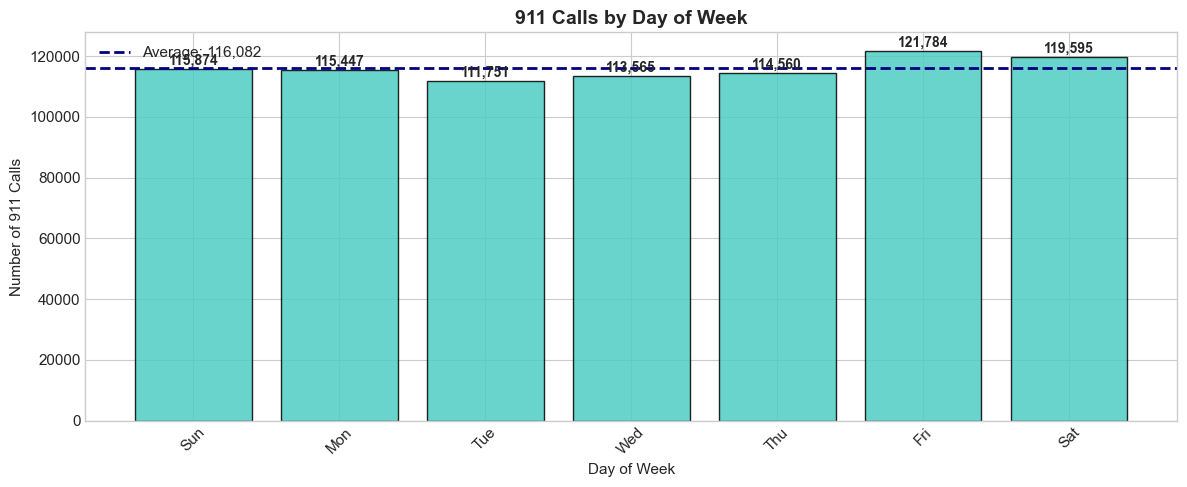

Busiest day: Fri with 121,784 calls
Quietest day: Tue with 111,751 calls


In [11]:
day_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
daily_calls = extracted_data['Response Day of Week'].value_counts().reindex(day_order)

fig, ax = plt.subplots(figsize=(12, 5))
colors = ['#FF6B6B' if day in ['Friday', 'Saturday'] else '#4ECDC4' for day in day_order]
bars = ax.bar(daily_calls.index, daily_calls.values, color=colors, edgecolor='black', alpha=0.85)

ax.axhline(y=daily_calls.mean(), color='navy', linestyle='--', linewidth=2, label=f'Average: {daily_calls.mean():,.0f}')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of 911 Calls')
ax.set_title('911 Calls by Day of Week', fontsize=14, fontweight='bold')
ax.legend()

for bar, val in zip(bars, daily_calls.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, 
            f'{val:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('dataset_visualization/peak_demand_by_day_of_week.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Busiest day: {daily_calls.idxmax()} with {daily_calls.max():,} calls")
print(f"Quietest day: {daily_calls.idxmin()} with {daily_calls.min():,} calls")


## Monthly Distribution

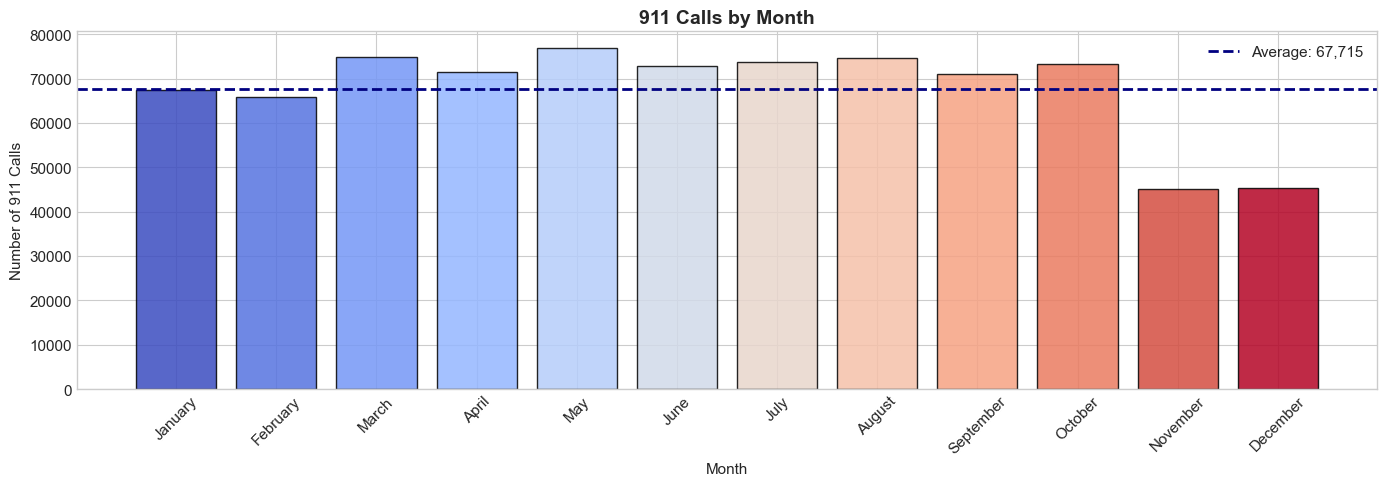

Busiest month: May with 76,812 calls
Quietest month: November with 45,001 calls


In [12]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_calls = extracted_data['Month_Name'].value_counts().reindex(month_order).dropna()

fig, ax = plt.subplots(figsize=(14, 5))
colors = plt.cm.coolwarm(np.linspace(0, 1, len(monthly_calls)))
bars = ax.bar(monthly_calls.index, monthly_calls.values, color=colors, edgecolor='black', alpha=0.85)

ax.axhline(y=monthly_calls.mean(), color='navy', linestyle='--', linewidth=2, label=f'Average: {monthly_calls.mean():,.0f}')
ax.set_xlabel('Month')
ax.set_ylabel('Number of 911 Calls')
ax.set_title('911 Calls by Month', fontsize=14, fontweight='bold')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('dataset_visualization/peak_demand_by_month.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Busiest month: {monthly_calls.idxmax()} with {monthly_calls.max():,} calls")
print(f"Quietest month: {monthly_calls.idxmin()} with {monthly_calls.min():,} calls")


## Hour Heatmap

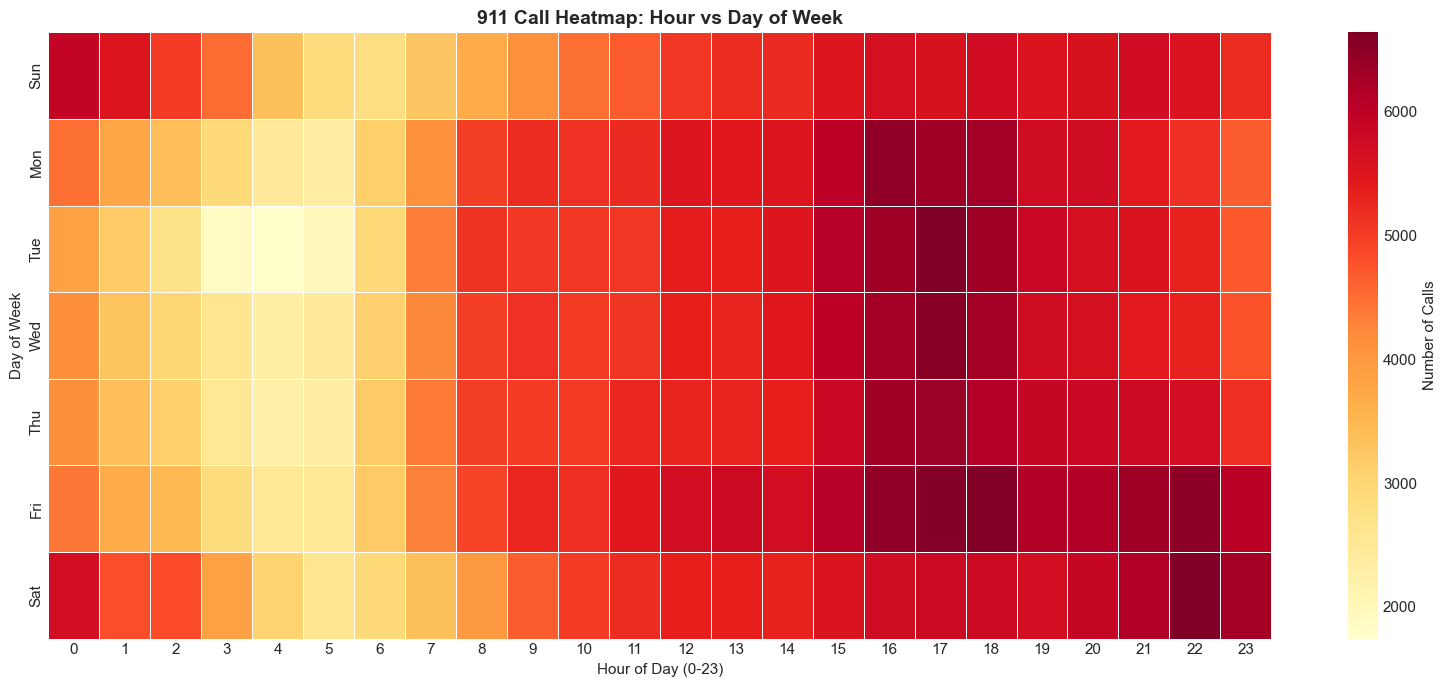

Peak time: Tue at 17:00 with 6,638 calls


In [13]:
pivot_heatmap = extracted_data.groupby(['Response Day of Week', 'Response Hour']).size().unstack(fill_value=0)
pivot_heatmap = pivot_heatmap.reindex(day_order)

plt.figure(figsize=(16, 7))
sns.heatmap(pivot_heatmap, cmap='YlOrRd', annot=False, fmt='d', 
            linewidths=0.5, cbar_kws={'label': 'Number of Calls'})
plt.title('911 Call Heatmap: Hour vs Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.savefig('dataset_visualization/heatmap_hour_vs_day.png', dpi=300, bbox_inches='tight')
plt.show()

max_val = pivot_heatmap.max().max()
max_day = pivot_heatmap.max(axis=1).idxmax()
max_hour = pivot_heatmap.loc[max_day].idxmax()
print(f"Peak time: {max_day} at {max_hour}:00 with {max_val:,} calls")


## Priority Level Distribution


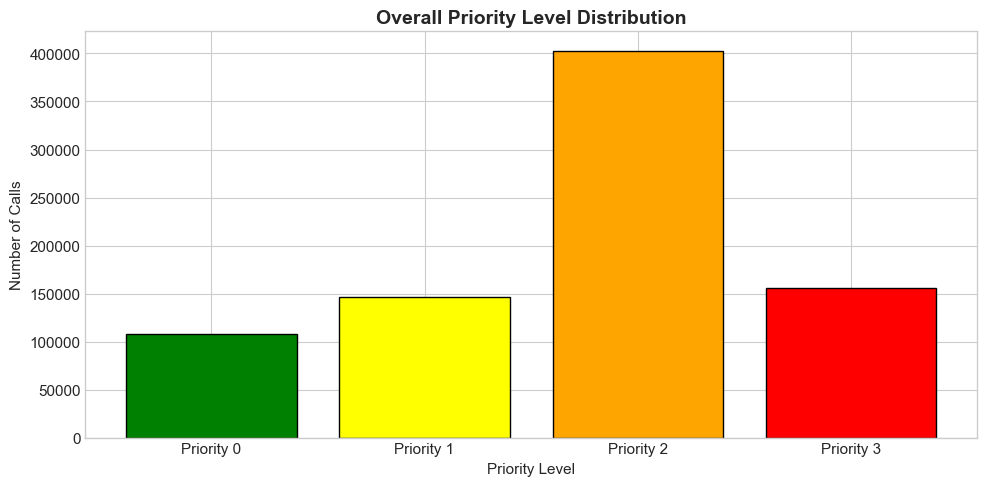

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))

priority_counts = extracted_data['Priority Level'].value_counts().sort_index()
ax.bar(priority_counts.index.astype(str), priority_counts.values, 
       color=['green', 'yellow', 'orange', 'red', 'darkred'][:len(priority_counts)], 
       edgecolor='black')
ax.set_xlabel('Priority Level')
ax.set_ylabel('Number of Calls')
ax.set_title('Overall Priority Level Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('dataset_visualization/priority_level_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


## Mental Health Flag Distribution


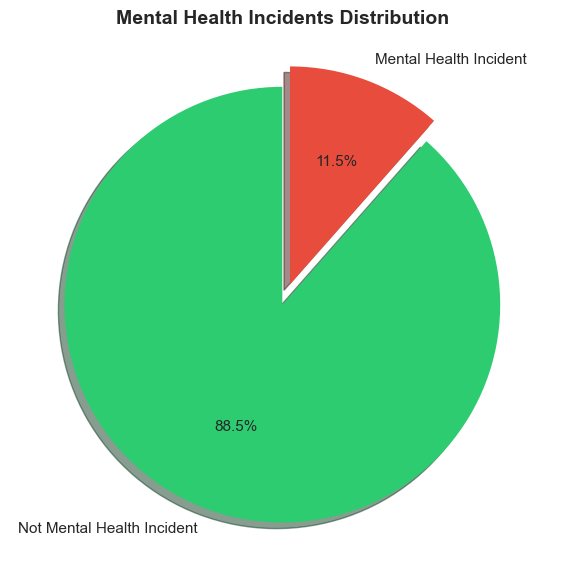

Total Mental Health Incidents: 93,425
Total Non-Mental Health: 719,151
Mental Health Percentage: 11.50%


In [15]:
fig, ax = plt.subplots(figsize=(6, 6))

mh_counts = extracted_data['Mental Health Flag'].value_counts()
colors = ['#2ecc71', '#e74c3c']
ax.pie(mh_counts.values, labels=mh_counts.index, autopct='%1.1f%%', 
       colors=colors, explode=[0, 0.1], shadow=True, startangle=90)
ax.set_title('Mental Health Incidents Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('dataset_visualization/mental_health_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

mh_total = extracted_data['Mental Health Flag'].value_counts()
print(f"Total Mental Health Incidents: {mh_total.get('Mental Health Incident', 0):,}")
print(f"Total Non-Mental Health: {mh_total.get('Not Mental Health Incident', 0):,}")
print(f"Mental Health Percentage: {mh_total.get('Mental Health Incident', 0) / len(extracted_data) * 100:.2f}%")


## Initial Problem Category Distribution


Total categories: 40


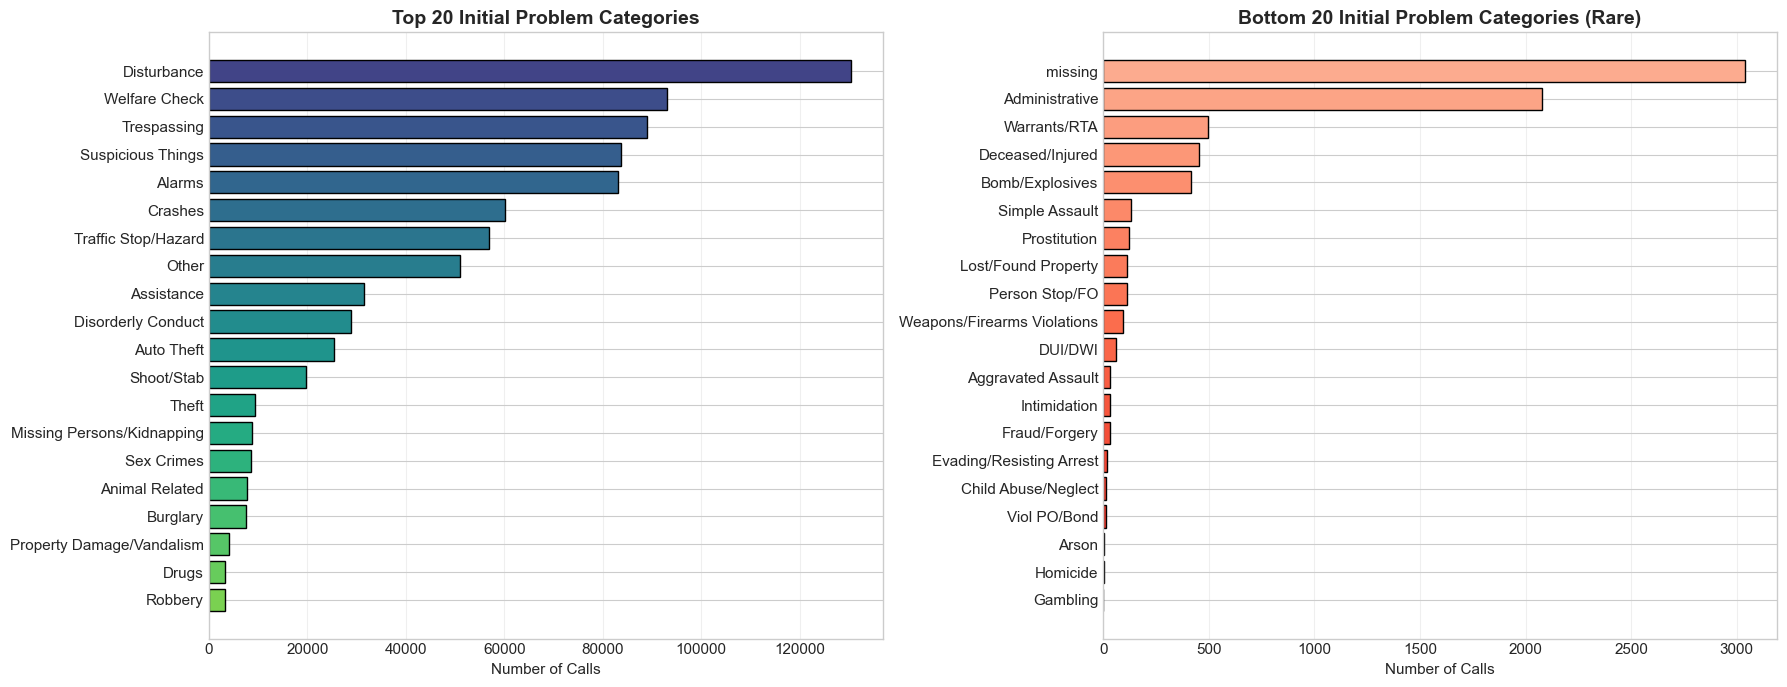

Total unique categories: 40
Most common: Disturbance (130,317 calls)
Least common: Gambling (1 calls)


In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

category_counts = extracted_data['Initial Problem Category'].value_counts()
print(f"Total categories: {extracted_data['Initial Problem Category'].nunique()}")

ax1 = axes[0]
top_20 = category_counts.head(20)
colors_gradient = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_20)))
bars = ax1.barh(top_20.index[::-1], top_20.values[::-1], color=colors_gradient[::-1], edgecolor='black')
ax1.set_xlabel('Number of Calls')
ax1.set_title('Top 20 Initial Problem Categories', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

ax2 = axes[1]
bottom_20 = category_counts.tail(20)
colors_red = plt.cm.Reds(np.linspace(0.3, 0.7, len(bottom_20)))
ax2.barh(bottom_20.index[::-1], bottom_20.values[::-1], color=colors_red[::-1], edgecolor='black')
ax2.set_xlabel('Number of Calls')
ax2.set_title('Bottom 20 Initial Problem Categories (Rare)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('dataset_visualization/initial_problem_category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Total unique categories: {extracted_data['Initial Problem Category'].nunique()}")
print(f"Most common: {category_counts.index[0]} ({category_counts.iloc[0]:,} calls)")
print(f"Least common: {category_counts.index[-1]} ({category_counts.iloc[-1]:,} calls)")


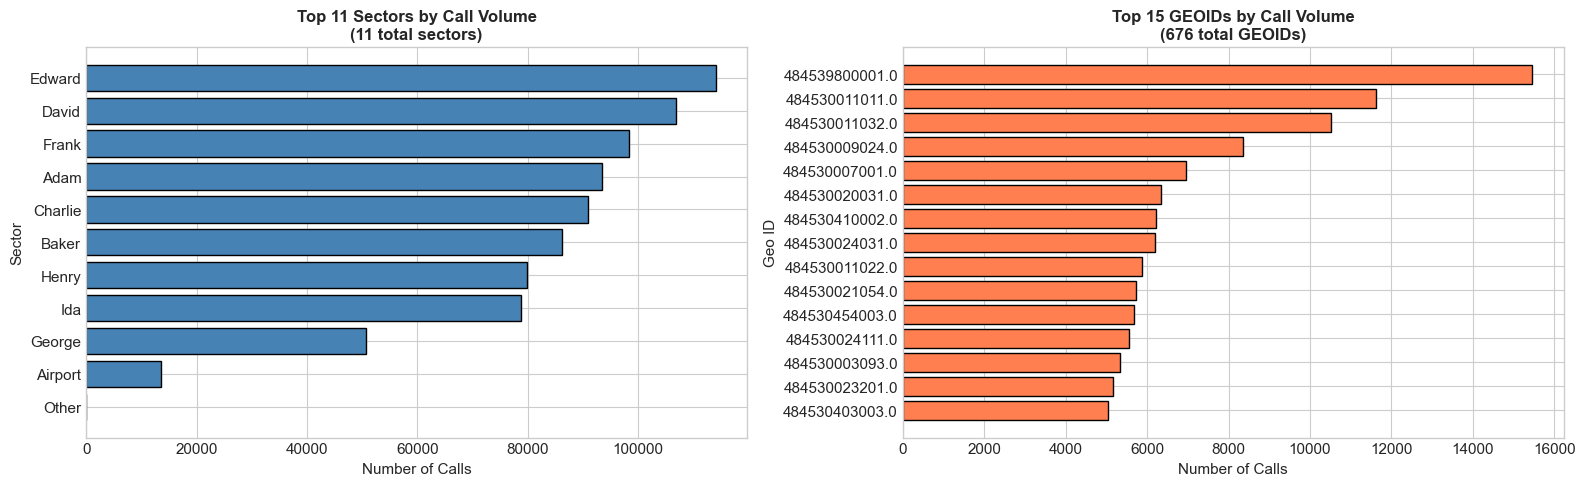

Sectors: 11 unique areas
GEOIDs: 676 unique areas
GEOID provides 61.5x more granular predictions


In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sector_calls = extracted_data['Sector'].value_counts().head(15)
axes[0].barh(sector_calls.index[::-1], sector_calls.values[::-1], color='steelblue', edgecolor='black')
axes[0].set_xlabel('Number of Calls')
axes[0].set_ylabel('Sector')
axes[0].set_title(f'Top 11 Sectors by Call Volume\n({extracted_data["Sector"].nunique()} total sectors)', 
                  fontsize=12, fontweight='bold')

geoid_calls = extracted_data['Geo ID'].value_counts().head(15)
axes[1].barh(geoid_calls.index[::-1].astype(str), geoid_calls.values[::-1], color='coral', edgecolor='black')
axes[1].set_xlabel('Number of Calls')
axes[1].set_ylabel('Geo ID')
axes[1].set_title(f'Top 15 GEOIDs by Call Volume\n({extracted_data["Geo ID"].nunique()} total GEOIDs)', 
                  fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('dataset_visualization/regional_comparison_sector_vs_geoid.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Sectors: {extracted_data['Sector'].nunique()} unique areas")
print(f"GEOIDs: {extracted_data['Geo ID'].nunique()} unique areas")
print(f"GEOID provides {extracted_data['Geo ID'].nunique() / extracted_data['Sector'].nunique():.1f}x more granular predictions")
